In [ ]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample
import deltas.classifiers.models as models
from deltas.classifiers.mimic_train import LargeMarginClassifierMIMIC, MIMIC_torch
from sklearn.model_selection import GridSearchCV

In [ ]:
dataset = 'MIMIC-III-mortality'
data_clf = data.get_real_dataset(dataset, scale=True)

In [27]:
data = data_clf['data']
# clf = MIMIC_torch(lr=0.001, cuda=False).fit(
#     data['X'], data['y'], epochs=50)
clf = models.NN(
    hidden_layer_sizes=(50, 100, 200, 300, 500, 1000),
    # activation='logistic',
                ).fit(data['X'], data['y'])
# param_grid = {'solver': ['lbfgs', 'sgd', 'adam'],
#               'hidden_layer_sizes': [(100,), (100, 500, 100), (100, 200, 200, 100), (100, 200, 500, 200, 100)],
#             'activation': ['relu', 'tanh', 'logistic'],
#             'learning_rate_init': [0.0001, 0.001, 0.01]}
# print('Tuning params with 5 fold CV')
#         # original
# grid_original = GridSearchCV(models.NN(), param_grid, refit=True, n_jobs=-1)
# grid_original.fit(data['X'], data['y'])
# clf = grid_original.best_estimator_
# print(f'Best params: {grid_original.best_params_}')

Original Data
plotting training data as data input


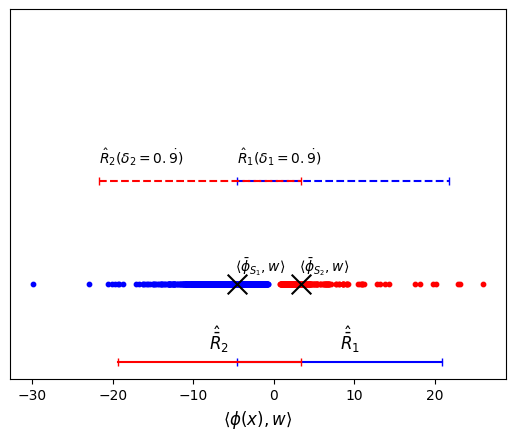

Budget 1000 found 323 viable downsampled solutions
Best solution found by removing 880 data points
Downsampled Data:


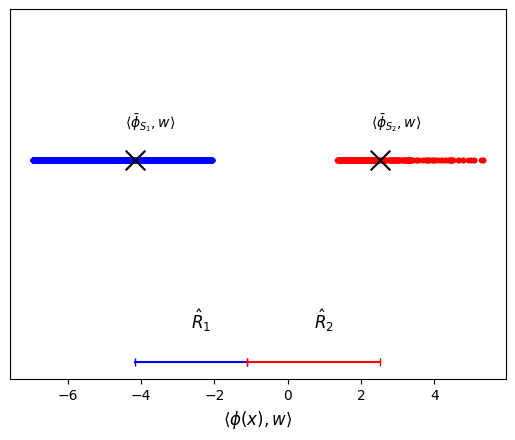

In [28]:
X = data_clf['data']['X']
y = data_clf['data']['y']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y,
                                                     _print=True,
                                                     _plot=True,
                                                     max_trials=1000,
                                                     parallel=True)

          Accuracy    G-Mean        F1
Method                                
Original  0.839127  0.415354  0.198658
Deltas    0.793317  0.469261  0.208462 


Original


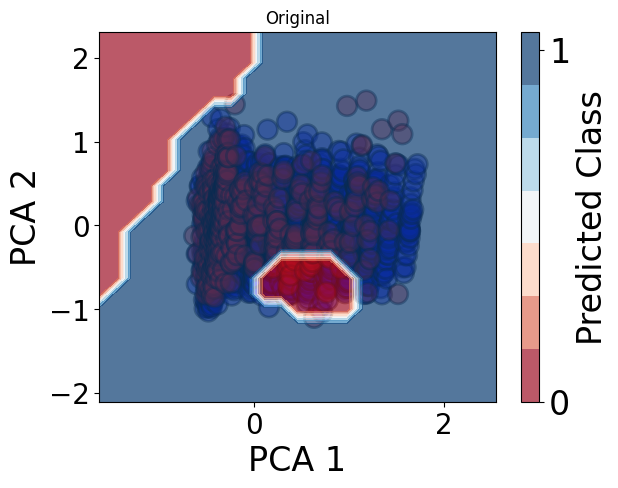

Deltas


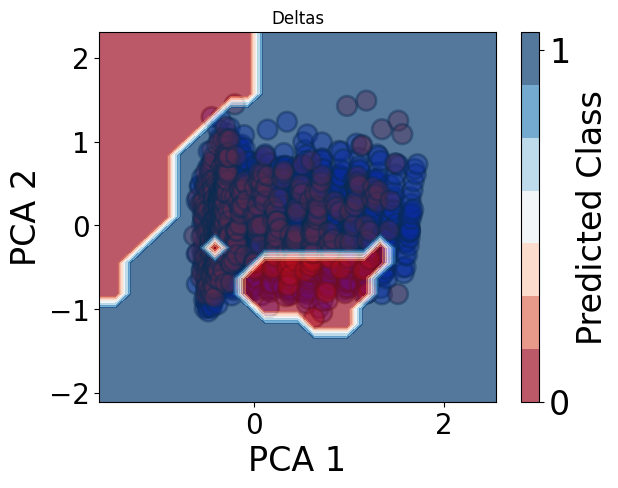

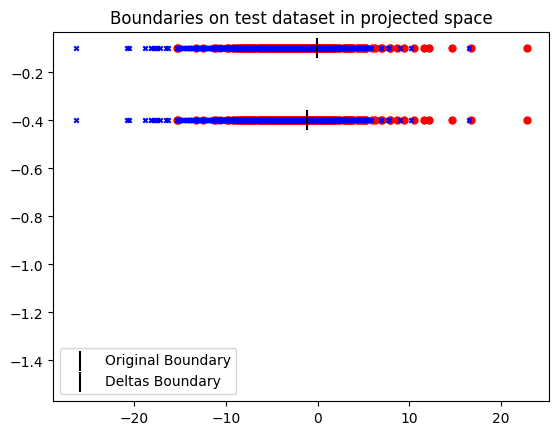

,Accuracy,G-Mean,F1
Method,,,
Original,0.839127,0.415354,0.198658
Deltas,0.793317,0.469261,0.208462


In [22]:
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
                     _plot=True, dim_reducer=data_clf['dim_reducer'])